<a href="https://colab.research.google.com/github/Shubhranshu-Malhotra/Metal-Surface-Defects-Classification/blob/main/metal_surface_defects_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metal Surface Defect Detection
## Weekend Project

This is a weekend project so that I can keep applying whatever I learn.



## Defining the Project

###1) Problem
This is a multiclass classification project 
The goal of this project is to classify the images of the metal surfaces into **six classes**   

###2) Data
The dataset for this project is NEU Metal Surface Defects Database which contains six kinds of typical surface defects of the hot-rolled steel strip are collected, i.e., rolled-in scale (RS), patches (Pa), crazing (Cr), pitted surface (PS), inclusion (In) and scratches (Sc).   

The database includes 1,800 grayscale images: 300 samples each of six different kinds of typical surface defects.  
The data is organized in three folders, i.e., train, test, valid. The train folder contains six subfolders that have 276 image files in each folder. Accordingly, the test and valid contains six subfolders that have 12 images in each folder.  

###3) Evaluation
Intially the aim will be an accuracy of 90%.  
Note: The evaluation metrics will change as the project progresses.

###4) Features

*   We are dealing with image data so, we will be using Deep Learning for classification
*   Our data for this project consists of a total of **1800 images**  
    -  Train images = 276 per class  
    -  Validation images = 12 per class  
    -  Test images = 12 per class  

*   Our data consists of three classes of images:
    1.   rolled-in scale (RS)
    2.   patches (Pa)
    3.   crazing (Cr)
    4.   pitted surface (PS)
    5.   inclusion (In)
    6.   scratches (Sc)
*   The images are in RBG format.
*   All the images are grey scaled.
*   The images are of different sizes. We need to resize them.  



## Getting Data Ready
The data is present in the Google Drive in NEU_metal_surface_defects folder.    
The database includes 1,800 grayscale images: 300 samples each of six different kinds of typical surface defects.    
The data is organized in three folders, i.e., train, test, valid. The train folder contains six subfolders that have 276 image files in each folder. Accordingly, the test and valid contains six subfolders that have 12 images in each folder.    
There is no label file since the data is divided into separate subfolders.  


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import os

In [2]:
# Setup the train, validation and test paths

train_path = '/content/drive/MyDrive/Datasets/NEU_metal_surface_defects/train/'
val_path = '/content/drive/MyDrive/Datasets/NEU_metal_surface_defects/valid/'
test_path = '/content/drive/MyDrive/Datasets/NEU_metal_surface_defects/test/'

In [3]:
os.listdir(val_path)

['Pitted', 'Inclusion', 'Patches', 'Crazing', 'Rolled', 'Scratches']

In [4]:
os.listdir(val_path + 'Scratches')

['Sc_12.bmp',
 'Sc_111.bmp',
 'Sc_114.bmp',
 'Sc_119.bmp',
 'Sc_112.bmp',
 'Sc_113.bmp',
 'Sc_110.bmp',
 'Sc_11.bmp',
 'Sc_116.bmp',
 'Sc_115.bmp',
 'Sc_118.bmp',
 'Sc_117.bmp']

In [5]:
img = imread(val_path + 'Scratches/Sc_111.bmp')

In [6]:
img.shape

(200, 200)

In [7]:
img.max(), img.min()

(255, 48)

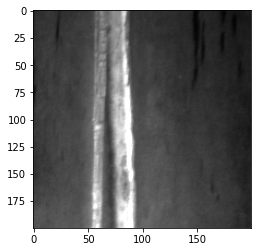

In [8]:
plt.imshow(imread(val_path + 'Scratches/Sc_111.bmp','BMP'), cmap = 'gray')

#### Data Inspection
1.  Check how many images in each folder
2.  Check the dimensions of images

In [9]:
len(os.listdir(train_path + 'Pitted')), len(os.listdir(train_path + 'Scratches')), len(os.listdir(train_path + 'Rolled')), len(os.listdir(train_path + 'Inclusion')), len(os.listdir(train_path + 'Patches')), len(os.listdir(train_path + 'Crazing'))

(276, 276, 276, 276, 276, 276)

In [10]:
len(os.listdir(val_path + 'Pitted')), len(os.listdir(val_path + 'Scratches')), len(os.listdir(val_path + 'Rolled')), len(os.listdir(val_path + 'Inclusion')), len(os.listdir(val_path + 'Patches')), len(os.listdir(val_path + 'Crazing'))

(12, 12, 12, 12, 12, 12)

In [11]:
len(os.listdir(test_path + 'Pitted')), len(os.listdir(test_path + 'Scratches')), len(os.listdir(test_path + 'Rolled')), len(os.listdir(test_path + 'Inclusion')), len(os.listdir(test_path + 'Patches')), len(os.listdir(test_path + 'Crazing'))

(12, 12, 12, 12, 12, 12)

In [12]:
dim1 = []
dim2 = []

for img_path in os.listdir(train_path+'Pitted/'):
  image = imread(train_path + 'Pitted/' + img_path)
  dim1.append(image.shape[0])
  dim2.append(image.shape[1])


In [13]:
np.min(dim1), np.min(dim1)

(200, 200)

In [14]:
np.min(dim2), np.min(dim2)

(200, 200)

In [15]:
INPUT_SHAPE = (None, 200, 200, 3)

### Create ImageDataGenerator



In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.20, # Shift the pic width by a max of 5%
                               height_shift_range=0.20, # Shift the pic height by a max of 5%
                               rescale=1./255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allow horizontal flipping
                               vertical_flip = True, # Allow vertical flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )
test_generator = ImageDataGenerator(rescale=1./255)

#### Generating random transformed images

TypeError: ignored

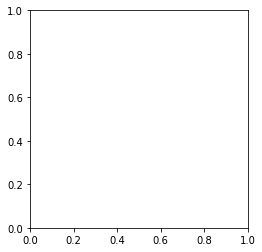

In [147]:
trial_img = imread(val_path + 'Scratches/Sc_111.bmp')
trial_img = trial_img.reshape(200,200,1)
plt.imshow(trial_img, cmap = 'gray')

In [96]:
trial_img = imread(val_path + 'Scratches/Sc_111.bmp')

In [97]:
trial_img.shape

(200, 200)

In [86]:
type(trial_img)
trial_img = trial_img.reshape(200,200)

In [93]:
trial_img

array([[ 76,  72,  80, ...,  73,  72,  73],
       [ 80,  78,  82, ...,  73,  69,  73],
       [ 80,  79,  83, ...,  72,  70,  69],
       ...,
       [119, 119, 114, ...,  78,  80,  81],
       [118, 115, 111, ...,  78,  82,  80],
       [118, 114, 112, ...,  77,  80,  80]], dtype=uint8)

TypeError: ignored

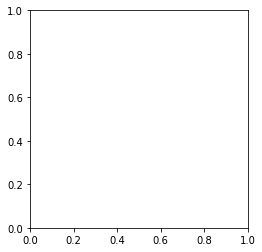

In [83]:
plt.imshow(trial_img, cmap = 'gray')

In [98]:
image_generator.random_transform(trial_img)

AxisError: ignored

In [105]:
img_naruto = imread('/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/pilot_selected_all_in_one/Naruto_Uzumaki (41).png')

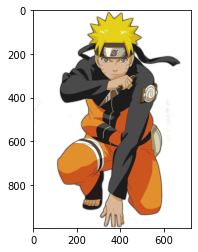

In [106]:
plt.imshow(img_naruto)

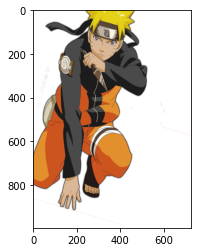

In [108]:
plt.imshow(image_generator.random_transform(img_naruto))

In [117]:
import cv2
img_naruto_path = '/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/pilot_selected_all_in_one/Naruto_Uzumaki (41).png'
img_naruto2 = cv2.imread('/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/pilot_selected_all_in_one/Naruto_Uzumaki (41).png',0)

In [118]:
img_naruto2.shape

(998, 726)

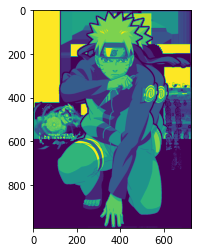

In [119]:
plt.imshow(img_naruto2)

In [145]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
iimage = load_img(img_naruto_path)
# iimage = img_to_array(image)
# iimage = np.expand_dims(image, axis=2)

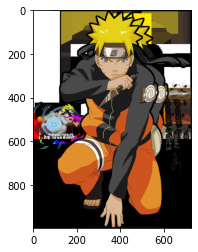

In [146]:
plt.imshow(iimage)

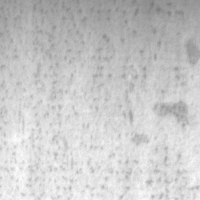

In [136]:
from google.colab.patches import cv2_imshow
cv2_imshow(iimage)

In [137]:
iimage

array([[[153],
        [155],
        [155],
        ...,
        [147],
        [148],
        [149]],

       [[159],
        [158],
        [154],
        ...,
        [147],
        [149],
        [151]],

       [[159],
        [154],
        [155],
        ...,
        [151],
        [153],
        [151]],

       ...,

       [[221],
        [232],
        [238],
        ...,
        [228],
        [230],
        [236]],

       [[229],
        [238],
        [238],
        ...,
        [236],
        [237],
        [236]],

       [[239],
        [239],
        [230],
        ...,
        [233],
        [242],
        [243]]], dtype=uint8)

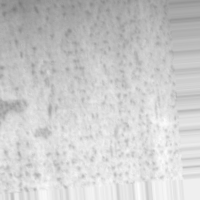

In [140]:
cv2_imshow(image_generator.random_transform(iimage))

#### Loading Images

In [17]:
train_images = train_generator.flow_from_directory(train_path,
                                                   target_size = (200, 200),
                                                   batch_size = 32,
                                                   shuffle = True,
                                                   seed = 42)

Found 1656 images belonging to 6 classes.


In [18]:
# Also try using train generator
val_images = test_generator.flow_from_directory(val_path,
                                                target_size = (200, 200),
                                                shuffle = False,
                                                seed = 42)

Found 72 images belonging to 6 classes.


In [19]:
test_images = test_generator.flow_from_directory(test_path,
                                                target_size = (200, 200),
                                                shuffle = False,
                                                seed = 42)

Found 72 images belonging to 6 classes.


In [20]:
train_images.class_indices

{'Crazing': 0,
 'Inclusion': 1,
 'Patches': 2,
 'Pitted': 3,
 'Rolled': 4,
 'Scratches': 5}

In [21]:
val_images.class_indices

{'Crazing': 0,
 'Inclusion': 1,
 'Patches': 2,
 'Pitted': 3,
 'Rolled': 4,
 'Scratches': 5}

In [22]:
test_images.class_indices

{'Crazing': 0,
 'Inclusion': 1,
 'Patches': 2,
 'Pitted': 3,
 'Rolled': 4,
 'Scratches': 5}


### Defining Callbacks

In [23]:
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.98):
      print('Reached 98% accuracy on training data!\n Stopping training to prevent overfitting.')
      self.model.stop_training = True

In [24]:
my_callback = MyCallback()

In [25]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5)

In [26]:
%load_ext tensorboard

In [27]:
import datetime
import pytz

my_time = datetime.datetime.now(pytz.timezone('Asia/Kolkata')).strftime("%d%m%Y-%H%M%S")

log_dir = os.path.join("/content/drive/MyDrive/Datasets/NEU_metal_surface_defects/tensorboard_logs",
                        my_time)
  
tensorboard = tf.keras.callbacks.TensorBoard(log_dir)

### Creating a model

In [28]:
MODEL_URL = "https://tfhub.dev/google/imagenet/inception_v3/classification/4"
NUM_CLASSES = len(train_images.class_indices)

In [36]:
from tensorflow.keras.models import Sequential
import tensorflow_hub as hub

model = Sequential([hub.KerasLayer(MODEL_URL),
                   tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')])

model.compile(loss = 'categorical_crossentropy',
              metrics = ['accuracy'],
              optimizer = 'Adam')

model.build(INPUT_SHAPE)

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1001)              23853833  
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 6012      
Total params: 23,859,845
Trainable params: 6,012
Non-trainable params: 23,853,833
_________________________________________________________________


## Training the model

In [30]:
# Decide number of epochs to train for
NUM_EPOCHS = 50 #@param {type:'slider', min:20, max:100,step:10}

In [31]:
# Check if we are using GPU or not
print("GPU available!!") if tf.config.list_physical_devices("GPU") else print("NO GPU Available :(")

GPU available!!


In [38]:
np.random.seed(42)
model.fit(train_images,
          epochs = NUM_EPOCHS,
          validation_data = val_images,
          callbacks = [my_callback, early_stop, tensorboard])

Epoch 1/50
52/52 [==============================] - 436s 8s/step - loss: 2.1552 - accuracy: 0.4399 - val_loss: 0.3983 - val_accuracy: 0.8889
Epoch 2/50
52/52 [==============================] - 16s 314ms/step - loss: 0.3483 - accuracy: 0.8726 - val_loss: 0.1973 - val_accuracy: 0.9306
Epoch 3/50
52/52 [==============================] - 17s 317ms/step - loss: 0.3123 - accuracy: 0.8864 - val_loss: 0.1650 - val_accuracy: 0.9306
Epoch 4/50
52/52 [==============================] - 16s 316ms/step - loss: 0.2178 - accuracy: 0.9235 - val_loss: 0.1628 - val_accuracy: 0.9306
Epoch 5/50
52/52 [==============================] - 16s 317ms/step - loss: 0.1814 - accuracy: 0.9355 - val_loss: 0.1346 - val_accuracy: 0.9583
Epoch 6/50
52/52 [==============================] - 16s 315ms/step - loss: 0.1804 - accuracy: 0.9380 - val_loss: 0.1447 - val_accuracy: 0.9444
Epoch 7/50
52/52 [==============================] - 16s 316ms/step - loss: 0.0958 - accuracy: 0.9717 - val_loss: 0.0693 - val_accuracy: 1.0000
E